*Eduardus Tjitrahardja | @edutjie | 2022*

# Linear Regression

## Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Dataset

In [2]:
df = pd.read_csv('../data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

## EDA

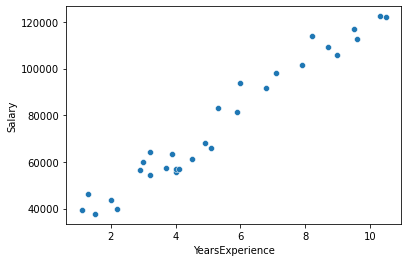

In [12]:
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = df)
plt.show()

In [13]:
corr = df.corr()
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Create Model

In [7]:
from sklearn.linear_model import LinearRegression

In [5]:
lr = LinearRegression()

## Create and Train Training Dataset

### Create Train and Test dataset

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df[['YearsExperience']], df['Salary'], test_size = 0.3, random_state = 101)
X_train.shape, X_test.shape

((21, 1), (9, 1))

### Train Training Dataset

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

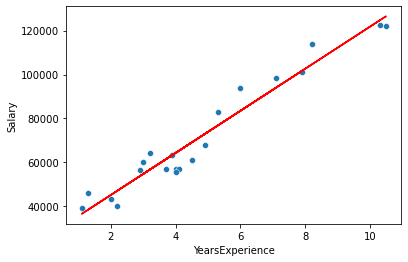

In [53]:
sns.scatterplot(x = X_train.YearsExperience, y = y_train)
plt.plot(X_train.YearsExperience, lr.predict(X_train), color = 'red')
plt.show()

In [28]:
lr.score(X_train, y_train)

0.9430010023853349

In [29]:
y_test_preds = lr.predict(X_test)
print(y_test_preds)

[ 91100.58255782 109297.20888234  56622.76425873  82481.12798305
  40341.57228416 117916.66345711 116958.94628213  74819.39058325
 112170.36040726]


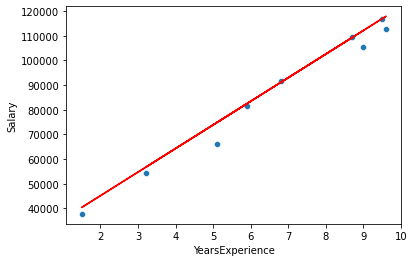

In [45]:
sns.scatterplot(x = X_test.YearsExperience, y = y_test)
plt.plot(X_test.YearsExperience, y_test_preds, color = 'red')
plt.show()

### Score test predictions

In [56]:
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
lr.score(X_test, y_test)

0.9746363787521536

In [57]:
print("MSRE:", mean_squared_error(y_test, y_test_preds))
print("R2:", r2_score(y_test, y_test_preds))

MSRE: 17978409.49734415
R2: 0.9746363787521536


In [38]:
lr.coef_, lr.intercept_

(array([9577.17174975]), 25975.81465954113)

### Define features(X) and target(y)

In [63]:
X = df[['YearsExperience']]
y = df['Salary']

In [64]:
lr.score(X, y)

0.9557663575902307